In [93]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [94]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_2_wks.csv'
experiment_data = pd.read_csv(PATH)

In [95]:
experiment_data.head(10)

,treatment_date,test,is_signed_up,signup_date
0,2016-04-01,0,0,NaN
1,2016-04-01,0,0,NaN
2,2016-04-01,0,0,NaN
3,2016-04-01,0,0,NaN
4,2016-04-01,0,0,NaN
5,2016-04-01,0,0,NaN
6,2016-04-01,1,1,2016-04-02
7,2016-04-01,0,0,NaN
8,2016-04-01,0,0,NaN
9,2016-04-01,0,0,NaN


In [96]:
test = experiment_data[experiment_data.test == 1]
control = experiment_data[experiment_data.test == 0]

# How large is each group?
test_len = len(test)
control_len = len(control)
total = test_len + control_len
print('test group size is {} / {}%, control group size is {} / {}%\n'.format(test_len,round(test_len/total,2)*100,control_len,round(control_len/total,2)*100))


# What is the signup rate of test and control?
test_signup_rate = round(len(test[test.is_signed_up == 1]) / test_len * 100, 2)
control_signup_rate = round(len(control[control.is_signed_up == 1]) / control_len * 100, 2)
print('test signup rate is {}%, control signup rate is {}%\n'.format(test_signup_rate, control_signup_rate))

# Is the experiment already significant?
t_test = stats.ttest_ind(test.is_signed_up, control.is_signed_up)
print('We will see a disparity between the means as seen here up to ~{}% of \nthe time if the true means were equal.  That is too often to consider our results significant\n'.format(round(t_test.pvalue*100, 2)))

test group size is 3372 / 10.0%, control group size is 30241 / 90.0%

test signup rate is 13.7%, control signup rate is 14.71%

We will see a disparity between the means as seen here up to ~11.62% of 
the time if the true means were equal.  That is too often to consider our results significant



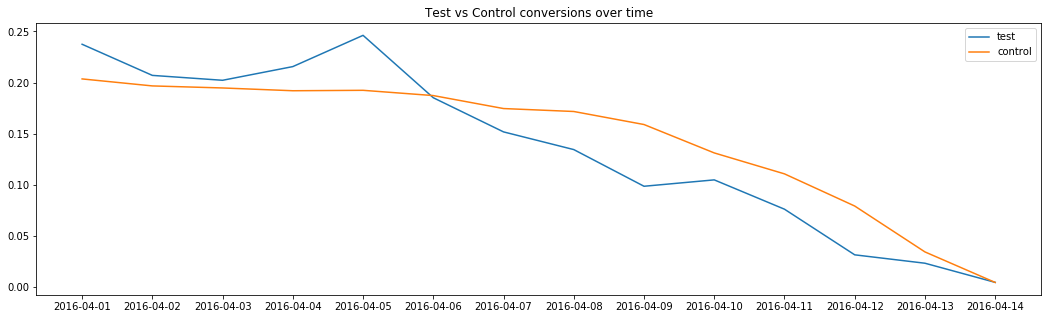

In [148]:
'''
So the groups are not significantly different, and indications do not seem great. The test signup rate seems lower than the old message. Can you see any reason why?
Use the cell below to write some code to investigate. It might be worth looking at the secondary metric:
Your code here.
'''

# consider effect of date
test_group = test[['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().reset_index()
control_group = control[['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().reset_index()
plt.figure(figsize=(18,5))
plt.plot(test_group['treatment_date'].tolist(), test_group['is_signed_up'].tolist(), label='test')
plt.plot(control_group['treatment_date'].tolist(), control_group['is_signed_up'].tolist(), label='control')
plt.legend()
plt.title('Test vs Control conversions over time')
plt.show()

#Only possible metric to evaluate is date - conversions are dropping over time and converge at the end towards 0.


In [149]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_final.csv'
experiment_data = pd.read_csv(PATH)

In [170]:
test = experiment_data[experiment_data.test == 1]
control = experiment_data[experiment_data.test == 0]

# How large is each group?
test_len = len(test)
control_len = len(control)
total = test_len + control_len
print('test group size is {} / {}%, control group size is {} / {}%\n'.format(test_len,round(test_len/total,2)*100,control_len,round(control_len/total,2)*100))

# What is the signup rate of test and control?
test_signup_rate = round(len(test[test.is_signed_up == 1]) / test_len * 100, 2)
control_signup_rate = round(len(control[control.is_signed_up == 1]) / control_len * 100, 2)
print('test signup rate is {}%, control signup rate is {}%\n'.format(test_signup_rate, control_signup_rate))

# Is the experiment already significant?
t_test = stats.ttest_ind(test.is_signed_up, control.is_signed_up)
print('Very significant difference in means here.  We should only expect this level of difference {}% of the time.  New email seems significantly better at conversions.'.format(t_test.pvalue*100))

test group size is 19861 / 30.0%, control group size is 46867 / 70.0%

test signup rate is 24.21%, control signup rate is 19.94%

Very significant difference in means here.  We should only expect this level of difference 4.248167714911685e-33% of the time.  New email seems significantly better at conversions.


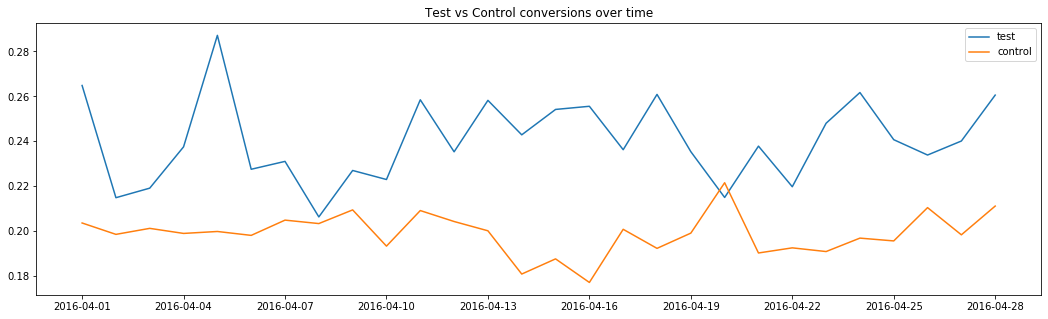

In [166]:
# consider effect of date
test_group = test[['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().reset_index()
control_group = control[['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().reset_index()

plt.figure(figsize=(18,5))
ax = plt.subplot() 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.plot(test_group['treatment_date'].tolist(), test_group['is_signed_up'].tolist(), label='test')
plt.plot(control_group['treatment_date'].tolist(), control_group['is_signed_up'].tolist(), label='control')
plt.legend()
plt.title('Test vs Control conversions over time')
plt.MaxNLocator(10)
plt.show()